<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## Motion of a Comet. Optimized Algorithm

### About this notebook

In this notebook we solve the equations of motion for a comet around the Sun in a 3D space.

---

## A Comet-Sun System

In this application problem, we will describe the motion of a comet orbiting around the Sun in 3D space. We will consider that the comet has a mass $m$ very small compared to Sun's mass $M$, i.e. $m \ll M$. This assumption implies that Sun will remain static as the comet orbits under the influence of its gravity. 

For example, the mass of Halley's comet is $m \approx 2.2 \times 10^{14}$ kg which is a very small quantity compared with Sun's mass $M \approx 1.9 \times 10^{30}$ kg.

---
The equations of motion of the comet, in cartesian coordinates with origin on the Sun's center, are

\begin{align}
\frac{d^2 x}{dt^2} = &- \frac{GM}{(x^2 + y^2 + z^2)^{3/2}} x \\
\frac{d^2 y}{dt^2} = &- \frac{GM}{(x^2 + y^2 + z^2)^{3/2}} y \\
\frac{d^2 z}{dt^2} = &- \frac{GM}{(x^2 + y^2 + z^2)^{3/2}} z .
\end{align}

In order to solve this ODEs system, we will transform it into a first-order differential system by introducing three new functions,

\begin{align}
\frac{d x}{dt} = &v^x \\
\frac{d y}{dt} = &v^y \\
\frac{d z}{dt} = &v^z \\
\frac{dv^x}{dt} = &- \frac{GM}{(x^2 + y^2 + z^2)^{3/2}} x \\
\frac{dv^y}{dt} = &- \frac{GM}{(x^2 + y^2 + z^2)^{3/2}} y \\
\frac{dv^z}{dt} = &- \frac{GM}{(x^2 + y^2 + z^2)^{3/2}} z
\end{align}


An important consideration to take into account involves the big numbers involved in the problem such as the Sun's mass and the distances, which will be of the order of $1$ au. Hence, it is convenient to use a system of units with

- unit of mass: Solar mass
- units of distance: au
- units of time: years

Hence, the Newtonian gravitational constant will have the value $G = 4\pi^2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
# %matplotlib notebook  # Makes interactive the 3D plot when running locally! 


# Relevant Constants in the units
# (years, AU, Solar_masses)
# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

The ODEs system is implemented by defining the function 

In [2]:
def ODE(t0, q0):
    '''
    ------------------------------------------
    ODE(t,q0) 
    ------------------------------------------
    ODEs system for the motion of the comet 
    
    Arguments:
    t0: time parameter (not necessary for 
        the Newtonian problem)
    q0: numpy array with the initial condition
        data
        q0 = [x0, y0, z0, vx0, vy0, vz0]
    mass: masses of the particles
    ------------------------------------------
    '''
    r = q0[0]**2 + q0[1]**2 + q0[2]**2
    f = np.zeros(6)
    f[0] = q0[3]
    f[1] = q0[4]
    f[2] = q0[5]
    f[3] = - G*M*q0[0]/r**(3/2)
    f[4] = - G*M*q0[1]/r**(3/2)
    f[5] = - G*M*q0[2]/r**(3/2)
    return f

## Conserved Energy

In order to ensure the integration procedure, we will introduce the total energy of the system, which is a conserved quantity,

\begin{equation}
\frac{E}{m} = \frac{1}{2} |\vec{v}|^2 -\frac{1}{2} \frac{GM}{r}
\end{equation}

In [3]:
def TotalEnergy(q):
  '''
  ------------------------------------------
  TotalEnergy(q)
  ------------------------------------------
  Evaluates the total energy for the system 
  ------------------------------------------
  Arguments:
  q: NumPy array with the state of the 
     system in the format
     q = [x, y, z, vx, vy, vz]
  ------------------------------------------
  Returns:
  E : Total Energy
  ------------------------------------------
  '''
  v2 = q[3]**2 + q[4]**2 + q[5]**2
  r = np.sqrt(q[0]**2 + q[1]**2 + q[2]**2)
  E = v2/2 - G*M/r
  return E


We will use a RK4 integrator to solve the problem.

In [4]:
def RK4(h, t0, q0):
    '''
    ------------------------------------------
    RK4(h, t0, q0)
    ------------------------------------------
    4th Order Runge-Kutta method for solving 
    a system of ODEs.
    Arguments:
    ODE: function defining the system of ODEs
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    k1 = h*ODE(t0, q0)
    k2 = h*ODE(t0 + h/2., q0 + k1/2.)
    k3 = h*ODE(t0 + h/2., q0 + k2/2.)
    k4 = h*ODE(t0 + h, q0 + k3)
    q1 = q0 + (k1 + 2.*k2 + 2.*k3 + k4)/6.
    return q1


--- 
## Initial Condition

The initial condition will be read from a file. Our first example will be the Sun-Earth system and the initial conditions are given in the file `sun_earth.dat`. Since this file uses the International System of Units (kg, m, s), the data must be transformed into the ($M_{\odot}$, ua, yr) system.


In [5]:

# Creation of the time grid (in years)
t_0 = 0.
t_f = 10.

# Number of steps in the grid
n = 100000

t = np.linspace(t_0, t_f, n)

# Constant stepsize defined by the number of steps in the grid
dt = (t_f - t_0)/n

# Array with the initial conditions for all particles
Q = np.zeros([n, 6]) # array [steps, 6 variables]

# Array with the information of total energy
Energy = np.zeros(n)

Q[0,0] = 1.
Q[0,1] = 0.
Q[0,2] = 0.
Q[0,3] = 0.2
Q[0,4] = 1.5
Q[0,5] = 1.
Energy[0] = TotalEnergy(Q[0])

## Main Loop and Plot

The main loop of the code calls the RK4 algorithm to update the positions, velocities and energy of the system. 

Using the data stores in the array `q`, we make a 3D-plot of the motion and check the energy conservation.

In [6]:

for i in range(n-1):
  Q[i+1] = RK4(dt, t[i], Q[i])
  Energy[i+1] = TotalEnergy(Q[i])


In [7]:
# Set boundaries for the plot
maximum = max(np.max(Q[:,0]), np.max(Q[:,1]), np.max(Q[:,2]))
minimum = min(np.min(Q[:,0]), np.min(Q[:,1]), np.min(Q[:,2]))
boundary = max(abs(maximum), abs(minimum))*(1+0.01) # Limit for the axis range

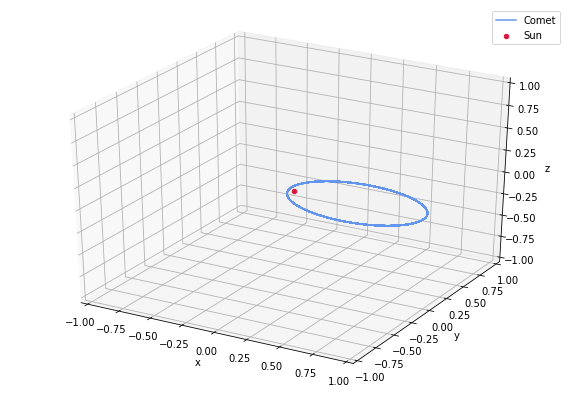

In [8]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

ax.scatter(0., 0., 0., color=('crimson'), label='Sun')
ax.plot(Q[:,0], Q[:,1], Q[:,2], color=('cornflowerblue'), label='Comet')

ax.set_xlim3d(-boundary, boundary)
ax.set_ylim3d(-boundary, boundary)
ax.set_zlim3d(-boundary, boundary)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
#plt.savefig(path+'cometAroundtheSun.jpg')
plt.show()

In [ ]:
energychange = (Energy[n-1]-Energy[0])/Energy[0]
print(f'The relative change in energy is {energychange:.5E} % with a stepsize of dt = {dt:.1E}')

The relative change in energy is 6.70032E-05 % with a stepsize of dt = 1.0E-04


---
## Intearctive plot using `Plotly`

Now, we will show the orbit with an interactive plot using the function 
`plotly.graph_objects.Scatter3d()`

See documentation at https://plotly.com/python/reference/scatter3d/

and examples at https://plotly.com/python/3d-scatter-plots/ 

In [9]:
import plotly.graph_objects as go

# Orbits 
x1, y1, z1 = [0.], [0.], [0.]
x2, y2, z2 = Q[:,0],Q[:,1],Q[:,2]


fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x1, y=y1, z=z1,
                                   mode='markers',
                                   marker=dict(
                                       size=3 ,
                                       color='red'),
                                   name='Sun'))
fig.add_trace(go.Scatter3d(x=x2, y=y2, z=z2,
                                   mode='markers',
                                   marker=dict(
                                       size=1,
                                       color='blue'),
                                   name='Comet'))
fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=5, range=[-boundary,boundary]),
        yaxis = dict(nticks=5, range=[-boundary,boundary]),
        zaxis = dict(nticks=5, range=[-boundary,boundary]),))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/AC/Colab Notebooks/09. Motion of a Comet 3D/'

np.savetxt(path+'comet_orbit3D.txt', Q, header='x y z vx vy vz')

Mounted at /content/drive
